# Project: Wrangling and Analyzing Data

## Table of Contents
* [Data Gathering](#Data_Gathering)
    * [By Directly Reading a CSV File](#By_Directly_Reading_a_CSV_File)
    * [By Downloading Using Python's requests Library](#By_Downloading_Using_Python's_requests_Library)
    * [By Querying Twitter API: Tweepy](#By_Querying_Twitter_API)
* [Data Assesssment](#Data_Assessment)
    * [Data Assessment Actions](#Data_Assessment_Actions)
    * [Quality Issues](#Quality_Issues)
    * [Tidiness Issues](#Tidiness_Issues)
* [Data Cleaning](#Data_Cleaning)
    * [Quality Issues Clean Up](#Quality_Issues_Clean_Up)
    * [Tidiness Issues Clean Up](#Tidiness_Issues_Clean_up)
* [Data Storing](#Data_Storing)
* [Data Analysis and Visualization](#Data_Analysis_and_Visualization)
    * [Analysis](#Analysis)
    * [Insights](#Insights)
    * [Visualization](#Visualization)

In [270]:
# Import of the required packages:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import re

## Data Gathering <a class="anchor" id="Data_Gathering"></a>

In the following cells, three sets of data for the project are gathered and loaded into the notebook. This is done using three distinct and relevant data gathering methods.


### By Directly Reading a CSV File <a class="anchor" id="By_Directly_Reading_a_CSV_File"></a>
1. The WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) is directly downloaded:

In [271]:
# Data from twitter_archive_enhanced.csv file is imported into a dataframe:
df_twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

### By Downloading Using Python's `requests` Library <a class="anchor" id="By_Downloading_Using_Python's_requests_Library"></a>
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [272]:
# Create folder for holding image predictions.
folder_name = 'image_predictions'
# Check to confirm if folder_name exists and create another to replace if it does:
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Download of the TSV file from the url using requests package:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Writing the contents of the folder_name to a file:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

# Using pandas to read contents of the image-predicitions.tsv to a dataframe:
df_image_predictions = pd.read_table('image_predictions/image-predictions.tsv')

### By Querying Twitter API: `Tweepy` <a class="anchor" id="By_Querying_Twitter_API"></a>
3. Use the Tweepy library to query additional data via the Twitter API tweet_json.txt)

The following accesses the twitter data using the API:

In [273]:
# Create an empty list, tweet_list:
tweet_list = []

# Reading the API data and appending the records in tweet_list:
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet['favorite_count'],
                        'display_text_range': tweet['display_text_range']
                       })

# Storing the records in tweet_list as a dataframe:
df_tweet_status = pd.DataFrame(tweet_list, columns = ['tweet_id', 
                                                      'retweet_count', 
                                                      'favorite_count',
                                                      'display_text_range'])

## Data Assessment <a class="anchor" id="Data_Assessment"></a>
In this section, **eight (8) quality issues and two (4) tidiness issuse** are detected and documented using both visual assessment and programmatic assessment to assess the data.

### Data Assessment Actions <a class="anchor" id="Data_Assessment_Actions"></a>
In order to identify the underlying quality and tidiness issues, the following actions are perfrormed in this sub-section.

In [274]:
# Check the df_twitter_archives data: 
df_twitter_archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [275]:
# Check the df_image_predictions data: 
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [276]:
# Check the df_tweet_status data: 
df_tweet_status

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"
5,891087950875897856,3261,20562,"[0, 138]"
6,890971913173991426,2158,12041,"[0, 140]"
7,890729181411237888,16716,56848,"[0, 118]"
8,890609185150312448,4429,28226,"[0, 122]"
9,890240255349198849,7711,32467,"[0, 133]"


In [277]:
# Using info() function on df_twitter_archives to check for columns, datatypes and missing values:
df_twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [278]:
# Using info() function on df_image_predictions to check for columns, datatypes and missing values:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [279]:
# Using info() function on df_tweet_status to check for columns, datatypes and missing values:
df_tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [280]:
# A check to confirm duplicated columns across the three datasets:
all_columns = pd.Series(list(df_tweet_status) + list(df_image_predictions) + list(df_twitter_archives))
all_columns[all_columns.duplicated()]

4     tweet_id
16    tweet_id
dtype: object

In [281]:
# Checking the range of the rating_numerator values:
df_twitter_archives.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
1120     204
290      182
902      165
1779     144
1634     143
1635     121
1228      99
1843      88
433       84
1254      80
695       75
340       75
1351      60
1202      50
1274      45
1433      44
763       27
1712      26
516       24
1663      20
55        17
285       15
291       15
83        14
866       14
        ... 
2183       3
1314       3
1928       3
765        3
2202       3
1692       3
1478       3
1898       3
1249       3
2305       3
2079       2
2326       2
2349       2
2237       2
2246       2
1920       2
1761       2
2310       2
1764       2
1940       1
2038       1
2091       1
1869       1
1446       1
605        1
2338       1
2261       1
2335       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [282]:
# Checking the range of the rating_denominator values:
df_twitter_archives.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
1228     90
1254     80
1843     80
433      70
1274     50
1351     50
1202     50
1433     40
1598     20
1165     20
1663     16
342      15
1662     11
1068     11
784      11
800      10
778      10
777      10
776      10
779      10
780      10
799      10
775      10
781      10
782      10
       ... 
1556     10
1555     10
1554     10
1553     10
1552     10
1551     10
1550     10
1549     10
1548     10
1547     10
1562     10
0        10
1571     10
1577     10
1564     10
1565     10
1566     10
1567     10
1568     10
1569     10
1570     10
1563     10
1572     10
1573     10
1574     10
1575     10
1576     10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [283]:
# Number of records having both doggo and puppo stages:
print(len(df_twitter_archives[(df_twitter_archives.doggo != 'None') & (df_twitter_archives.puppo != 'None')]))

1


In [284]:
# Number of records having both doggo and pupper stages:
print(len(df_twitter_archives[(df_twitter_archives.doggo != 'None') & (df_twitter_archives.pupper != 'None')]))

12


In [285]:
# Number of records having both doggo and floofer stages:
print(len(df_twitter_archives[(df_twitter_archives.doggo != 'None') & (df_twitter_archives.floofer != 'None')]))

1


In [286]:
# Check for the dog names:
df_twitter_archives.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [287]:
# Check the structure of the 'source' column:
df_twitter_archives.source.sample(10)

1562    <a href="http://twitter.com/download/iphone" r...
2026    <a href="http://twitter.com/download/iphone" r...
1883    <a href="http://twitter.com/download/iphone" r...
497     <a href="http://twitter.com/download/iphone" r...
1732    <a href="http://twitter.com/download/iphone" r...
808     <a href="http://twitter.com/download/iphone" r...
1013    <a href="http://twitter.com/download/iphone" r...
408     <a href="http://twitter.com/download/iphone" r...
678     <a href="http://twitter.com/download/iphone" r...
1690    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [288]:
# Check for the duplicated tweet ID's:
sum(df_twitter_archives.tweet_id.duplicated())

0

In [289]:
# Check for possible duplication due to retweet:
df_twitter_archives[df_twitter_archives.name == 'Alfie']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's your Lyft for tonight. Kin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345...,13,10,Alfie,None,None,None,None
661,791026214425268224,NaN,NaN,2016-10-25 21:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Alfie. He's touching a ...,7.638376e+17,4.196984e+09,2016-08-11 20:40:41 +0000,https://twitter.com/dog_rates/status/763837565...,11,10,Alfie,None,None,None,None
858,763837565564780549,NaN,NaN,2016-08-11 20:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's touching a butt. Couldn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763837565...,11,10,Alfie,None,None,None,None
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,None,None,None,None
2238,668113020489474048,NaN,NaN,2015-11-21 17:05:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's that one hypocritical gym ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668113020...,6,10,Alfie,None,None,None,None


### Quality Issues <a class="anchor" id="Quality_Issues"></a>
1. `rating_denominator` has values that are not 10.
2. `rating_numerator` has lower values (e.g 0) and higher values (e.g. 1776, 960, 666 etc.) than expected.
3. Erroneous datatypes (`in_reply_to_status_id`, `in_reply_to_user_id` and `timestamp` columns) in `df_twitter_archives` table.
4. Some records show more than one dog stage (doggo and pupper: 12 records, doggo and puppo/floofer: 1 record).
5. Some dog names are erroneous (e.g. my, not, one, this, very, unacceptable).
6. The source column has html tags and other information not really needed (e.g '<a href="http://twitter.com/download/..."').
7. Out of the 2,356 tweet id's from the `df_twitter_archives` table, only 2,075 have image predictions in `df_image_predictions` table.
8. Inconsistency using lower/upper case on column `p1` in the `df_image_predictions` table.
9. The presence of the retweets and replies in the `df_twitter_archives` dataset implies possible record duplicates in the dataframe.

### Tidiness Issues <a class="anchor" id="Tidiness_Issues"></a>
1. The column tweet_id in `df_twitter_archives` duplicated in `df_tweet_status` and `df_image_predictions` tables.
2. `retweet_count` and `favorite_count` columns from `df_tweet_status` table should be part of the `df_twitter_archives` table.
3. On `df_image_predictions`, only the columns `p1` and `p1_conf` are necessary since they present breed prediction with highest certainty.
4. One variable in three different columns in `df_twitter_archives` table.

## Data Cleaning <a class="anchor" id="Data_Cleaning"></a>

In this section, all issues documented during assessment are cleaned.


In [290]:
# Make copies of original pieces of data
twitter_archives_clean = df_twitter_archives.copy()
image_predictions_clean = df_image_predictions.copy()
tweet_status_clean = df_tweet_status.copy()

### Quality Issues Clean Up <a class="anchor" id="Quality_Issues_Clean_Up"></a>

### Issue 1: rating_denominator not equal to 10 as expected

#### Define:

Extract records with rating_denominator not equal to 10. 

For the rating_denominator which are divisible by 10:
- Divide the denominator by 10 and divide the numerator by this result. Assign this to the rating_numerator.
- Assign 10 to the rating_denominator.

Retain only the rating_denominators that are divisible by 10.

#### Code

In [291]:
# Extracting indices of the erroneous denominators:
incorrect_denominator_idx = twitter_archives_clean[twitter_archives_clean.rating_denominator != 10].rating_denominator.value_counts().index[0:].tolist()

# Extracting tweet ID's of the erroneous denominators:
err_denom_twt_ids = twitter_archives_clean[twitter_archives_clean.rating_denominator.isin(incorrect_denominator_idx)].tweet_id

for twt_id in err_denom_twt_ids:
    # Extracting each tweet's text:
    tweet_txt = twitter_archives_clean[twitter_archives_clean.tweet_id == twt_id].text.tolist()[0]
    # Use regex to find the pattern nn/nn.
    rating = re.findall('\d+\d\/\d+', tweet_txt)
    # Update if the rating  valid rating nn/nn
    if len(rating) == 1:
        numerator = rating[0].split('/')[0]
        denominator = rating[0].split('/')[1]
        if float(denominator) % 10 == 0:
            twitter_archives_clean.loc[twitter_archives_clean[twitter_archives_clean.tweet_id == twt_id].index,'rating_numerator'] = (float(numerator)/(float(denominator)/10))
            twitter_archives_clean.loc[twitter_archives_clean[twitter_archives_clean.tweet_id == twt_id].index,'rating_denominator'] = 10.0
        else:
            twitter_archives_clean.loc[twitter_archives_clean[twitter_archives_clean.tweet_id == twt_id].index,'rating_numerator'] = float(numerator)
            twitter_archives_clean.loc[twitter_archives_clean[twitter_archives_clean.tweet_id == twt_id].index,'rating_denominator'] = float(denominator)   
        
# Only retain rating_denominators with rating of 10:
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean.rating_denominator == 10]

#### Test

In [292]:
twitter_archives_clean.rating_denominator.value_counts()

10.0    2349
Name: rating_denominator, dtype: int64

### Issue 2: rating_numerator has value, 0, and other higher values than expected.

#### Define:
Extract rating_numerator values that are more than 14 or below 1 and store them in a list.
Use this list to remove records with these erroneous values.

#### Code

In [293]:
# Extract tweet_id's with the erroneous rating_numerator values:
rm_tweets_list = twitter_archives_clean[(twitter_archives_clean.rating_numerator > 14.0)
                           |(twitter_archives_clean.rating_numerator < 1.0)].tweet_id.tolist()

# Remove records with tweet_id's from the above list:
twitter_archives_clean = twitter_archives_clean[~twitter_archives_clean.tweet_id.isin(rm_tweets_list)]

#### Test

In [294]:
# Check for the rating_numerator values distribution:
twitter_archives_clean.rating_numerator.value_counts()

12.0    562
11.0    469
10.0    463
13.0    352
9.0     157
8.0     102
14.0     56
7.0      54
5.0      37
6.0      32
3.0      19
4.0      15
2.0       9
1.0       8
Name: rating_numerator, dtype: int64

### Issue 3: Erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id and timestamp columns)

#### Define
The column `timestamp` to be converted to datetime, `in_reply_to_status_id` and `in_reply_to_user_id` to be converted to integer data types.

#### Code

In [295]:
# For the missing values in the columns 'in_reply_to_status_id' and 'in_reply_to_user_id', replace with 0:
twitter_archives_clean.in_reply_to_status_id = twitter_archives_clean.in_reply_to_status_id.fillna(0)
twitter_archives_clean.in_reply_to_user_id = twitter_archives_clean.in_reply_to_user_id.fillna(0)

# Convert the values in the 'in_reply_to_status_id' and 'in_reply_to_user_id' columns to integer:
twitter_archives_clean.in_reply_to_status_id = twitter_archives_clean.in_reply_to_status_id.astype(np.int64)
twitter_archives_clean.in_reply_to_user_id = twitter_archives_clean.in_reply_to_user_id.astype(np.int64)

# Convert values in the 'timestamp' to datetime:
twitter_archives_clean.timestamp = pd.to_datetime(twitter_archives_clean.timestamp)

#### Test

In [296]:
# Confirm the data type changes in the 'timestamp', in_reply_to_status_id' and 'in_reply_to_user_id' columns:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2335 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2335 non-null int64
in_reply_to_status_id         2335 non-null int64
in_reply_to_user_id           2335 non-null int64
timestamp                     2335 non-null datetime64[ns]
source                        2335 non-null object
text                          2335 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2285 non-null object
rating_numerator              2335 non-null float64
rating_denominator            2335 non-null float64
name                          2335 non-null object
doggo                         2335 non-null object
floofer                       2335 non-null object
pupper                        2335 non-null object
puppo                         2335 non-null object
dtypes: datetime64[n

### Issue 4: Some records show more than one dog stage (doggo and pupper: 12 records, doggo and puppo/floofer: 1 record).

#### Define
Extract records with multiple dog stages and print their text to assess correct stage. Based on visually assessing the texts, the dog stages that were captured incorrectly are then amended accordingly.

#### Code

In [297]:
# Use for loop to print the tweet_id and the text of the dogs with stages 'doggo' and 'floofer' or 'doggo' and 'puppo':
for i, row in twitter_archives_clean[((twitter_archives_clean.doggo != 'None') & (twitter_archives_clean.floofer != 'None'))
                   | ((twitter_archives_clean.doggo != 'None') & (twitter_archives_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk



In [298]:
# Amend dog stage for the incorrectly captured:
twitter_archives_clean.loc[191, 'doggo'] = 'None'
twitter_archives_clean.loc[200, 'doggo'] = 'None'

In [299]:
# Use for loop to print the tweet_id and the text of the dogs with stages 'doggo' and 'pupper':
for i, row in twitter_archives_clean[((twitter_archives_clean.doggo != 'None') 
                                      & (twitter_archives_clean.pupper != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

817777686764523521 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7

808106460588765185 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho

802265048156610565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze

801115127852503040 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj

785639753186217984 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd

781308096455073793 Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u

775898661951791106 RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda

770093767776997377 RT

Based on the above extracted texts, I assumed that the dog stages are supposed to be captured as follows:

- 817777686764523521 - pupper
- 808106460588765185 - pupper
- 802265048156610565 - doggo
- 801115127852503040 - pupper
- 785639753186217984 - doggo
- 781308096455073793 - pupper
- 775898661951791106 - doggo
- 770093767776997377 - pupper
- 759793422261743616 - doggo
- 751583847268179968 - doggo
- 741067306818797568 - doggo
- 733109485275860992 - doggo

In [300]:
# Amend dog stage for the incorrectly captured:
twitter_archives_clean.loc[460, 'doggo'] = 'None'
twitter_archives_clean.loc[531, 'doggo'] = 'None'
twitter_archives_clean.loc[575, 'doggo'] = 'None'
twitter_archives_clean.loc[733, 'doggo'] = 'None'
twitter_archives_clean.loc[822, 'doggo'] = 'None'
twitter_archives_clean.loc[565, 'pupper'] = 'None'
twitter_archives_clean.loc[705, 'pupper'] = 'None'
twitter_archives_clean.loc[778, 'pupper'] = 'None'
twitter_archives_clean.loc[889, 'pupper'] = 'None'
twitter_archives_clean.loc[956, 'pupper'] = 'None'
twitter_archives_clean.loc[1063, 'pupper'] = 'None'
twitter_archives_clean.loc[1113, 'pupper'] = 'None'

#### Test

In [301]:
# Check to confirm if there are any records with multiple dog stages:
len(twitter_archives_clean[((twitter_archives_clean.doggo != 'None') & (twitter_archives_clean.pupper != 'None'))
                  | ((twitter_archives_clean.doggo != 'None') & (twitter_archives_clean.floofer != 'None')) 
                  | ((twitter_archives_clean.doggo != 'None') & (twitter_archives_clean.puppo != 'None'))])

0

### Issue 5: Some dog names are erroneous (e.g. my, not, one, this, very, unacceptable).

#### Define
Replace erroneous names with `None`

#### Code

In [302]:
# for loop to extract dog name from the data frame:
for name in twitter_archives_clean.name:
    # Conditional check for dog names beginning with lower case, and replace them with 'None':
    if name.islower():
        twitter_archives_clean.name.replace(name, "None", inplace = True)

#### Test

In [303]:
# Check to confirm absence of the erroneous names and change to 'None':
twitter_archives_clean.name.value_counts()

None           839
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Penny           10
Lola            10
Tucker          10
Bo               9
Winston          9
Sadie            8
Daisy            7
Buddy            7
Bailey           7
Toby             7
Jax              6
Koda             6
Milo             6
Bella            6
Scout            6
Oscar            6
Jack             6
Leo              6
Stanley          6
Rusty            6
Dave             6
Chester          5
Finn             5
Phil             5
George           5
              ... 
Tug              1
Travis           1
Emma             1
Brandi           1
Kaia             1
Blu              1
Cannon           1
Dobby            1
Izzy             1
Asher            1
Bubba            1
Clybe            1
Shakespeare      1
Bert             1
Colin            1
Baron            1
Newt             1
Tripp            1
Venti            1
Chaz             1
Tebow            1
Ron         

### Issue 6: The source column has html tags and other information not really needed (e.g '<a href="http://twitter.com/download/").

#### Define
Use `regex` to search for the html tags and other irrelevant characters, which should then be replaced by an empty space. The data type of the `source` column is then converted to categorical.

#### Code

In [304]:
# Using regex, html tags and other irrelevant information is searched and replaced with '':
twitter_archives_clean.source = twitter_archives_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

# The column source data type is then converted to categorical:
twitter_archives_clean.source = twitter_archives_clean.source.astype('category')

#### Test

In [305]:
# Confirmation of the removal of the irrelevant information and html tags:
twitter_archives_clean.source.value_counts()

Twitter for iPhone     2201
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

### Issue 7: Out of the 2,356 tweet id's from the df_twitter_archives table, only 2,075 have image predictions in df_image_predictions table.

#### Define
Retain only records having corresponding image predictions in the `df_image_predictions`.

#### Code

In [306]:
# From 'twitter_archives_clean', retain only records with images in 'image_predictions_clean':
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean['tweet_id'].isin(image_predictions_clean.tweet_id)]

#### Test

In [307]:
# Check to confirm that all records in 'twitter_archives_clean' have images from 'image_predictions_clean':
len(twitter_archives_clean[~twitter_archives_clean['tweet_id'].isin(image_predictions_clean['tweet_id'])])

0

### Issue 8: Inconsistency using lower/upper case on column p1 in the df_image_predictions table.

#### Define
The dog breed names in columns `p1`, `p2` and `p3` are standardized by conversion to lower cases and replacing spaces/hyphens with underscores.

#### Code

In [308]:
# Change the p1 (breed) column to lower case, and replace "-", " " characters with "_":
image_predictions_clean['p1'] = image_predictions_clean.p1.str.lower().replace(to_replace=["-", " "], value = "_")

#### Test

In [309]:
# View the top 20 records to confirm the lowercase/characters amendment.
image_predictions_clean[['tweet_id', 'p1']].head(20)

,tweet_id,p1
0,666020888022790149,welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,german_shepherd
3,666044226329800704,rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
5,666050758794694657,bernese_mountain_dog
6,666051853826850816,box_turtle
7,666055525042405380,chow
8,666057090499244032,shopping_cart
9,666058600524156928,miniature_poodle


### Issue 9: Possible duplicated records due to retweets and replies in the `df_twitter_archives` dataset.

#### Define

- Delete records with retweets/replies from the `twitter_archives_clean` dataframe
- Remove the remaining empty columns associated with retweets/replies (**retweets:** `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`; **replies:** `in_reply_to_status_id`, `in_reply_to_user_id`)

#### Code

In [310]:
# Retain only records whose retweet_status_id column is empty:
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean['retweeted_status_id'].isnull()]

# Confirm that the retweet columns are now having 0 entries:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1984 non-null int64
in_reply_to_status_id         1984 non-null int64
in_reply_to_user_id           1984 non-null int64
timestamp                     1984 non-null datetime64[ns]
source                        1984 non-null category
text                          1984 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1984 non-null object
rating_numerator              1984 non-null float64
rating_denominator            1984 non-null float64
name                          1984 non-null object
doggo                         1984 non-null object
floofer                       1984 non-null object
pupper                        1984 non-null object
puppo                         1984 non-null object
dtypes: category(1), dat

In [311]:
# Retain only records whose in_reply_to_status_id column is 0:
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean.in_reply_to_status_id == 0]

# Confirm that the in_reply_to_status_id column entries are only 0:
twitter_archives_clean.in_reply_to_status_id.sum()

0

In [312]:
# Remove the columns associated with retweets/replies from the twitter_archives_clean dataframe:
twitter_archives_clean = twitter_archives_clean.drop(['retweeted_status_id', 
                                                        'retweeted_status_user_id', 
                                                        'retweeted_status_timestamp',
                                                        'in_reply_to_status_id',
                                                        'in_reply_to_user_id'
                                                       ], axis = 1)

#### Test

In [313]:
# Confirm the removal of retweet/reply entries with their associated columns:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1962 non-null int64
timestamp             1962 non-null datetime64[ns]
source                1962 non-null category
text                  1962 non-null object
expanded_urls         1962 non-null object
rating_numerator      1962 non-null float64
rating_denominator    1962 non-null float64
name                  1962 non-null object
doggo                 1962 non-null object
floofer               1962 non-null object
pupper                1962 non-null object
puppo                 1962 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 186.0+ KB


### Tidiness Issues Clean Up <a class="anchor" id="Tidiness_Issues_Clean_up"></a>

### Issue 1, 2 & 3: 
- **`breed`, `retweet_count` and `favorite_count` columns should be part of the `df_twitter_archives table`.**
- **On `df_image_predictions`, only the columns `p1` and `p1_conf` are necessary since they present breed prediction with highest certainty.**
- **The column `tweet_id` in `df_twitter_archives` is duplicated in `df_tweet_status` and `df_image_predictions` tables.**

#### Define
Use pandas merge function to add breed, retweet_count and favorite_count columns to df_twitter_archives dataframe. Similarly, add p1 and p1_conf columns to the df_twitter_archives table. Then, retain only the tweet_id column in the df_twitter_archives table.

#### Code

In [314]:
# Add retweet_count and favorite_count columns from tweet_status_clean to twitter_archives_clean dataframe:
twitter_archives_clean = pd.merge(twitter_archives_clean, tweet_status_clean.iloc[:,:-1], on='tweet_id' )

# Add p1 and p1_conf columns from image_predictions_clean to twitter_archives_clean dataframe:
twitter_archives_clean = pd.merge(twitter_archives_clean, image_predictions_clean[['tweet_id', 'p1', 'p1_conf']], on='tweet_id')

# Rename p1 and p1_conf columns:
twitter_archives_clean.rename(columns = {"p1": "breed",
                                       "p1_conf": "confidence_level"},
                             inplace = True)

#### Test

In [315]:
# Use info() function to check for the additional columns, and the renaming done:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 16 columns):
tweet_id              1962 non-null int64
timestamp             1962 non-null datetime64[ns]
source                1962 non-null category
text                  1962 non-null object
expanded_urls         1962 non-null object
rating_numerator      1962 non-null float64
rating_denominator    1962 non-null float64
name                  1962 non-null object
doggo                 1962 non-null object
floofer               1962 non-null object
pupper                1962 non-null object
puppo                 1962 non-null object
retweet_count         1962 non-null int64
favorite_count        1962 non-null int64
breed                 1962 non-null object
confidence_level      1962 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 247.4+ KB


### Issue 4: One variable in three different columns in df_twitter_archives table.

#### Define
While retaining other columns, place dog stages in various columns under one column named `stage`.

#### Code

In [316]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 16 columns):
tweet_id              1962 non-null int64
timestamp             1962 non-null datetime64[ns]
source                1962 non-null category
text                  1962 non-null object
expanded_urls         1962 non-null object
rating_numerator      1962 non-null float64
rating_denominator    1962 non-null float64
name                  1962 non-null object
doggo                 1962 non-null object
floofer               1962 non-null object
pupper                1962 non-null object
puppo                 1962 non-null object
retweet_count         1962 non-null int64
favorite_count        1962 non-null int64
breed                 1962 non-null object
confidence_level      1962 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 247.4+ KB


In [317]:
# merge the doggo, floofer, pupper and puppo columns to a stage column
twitter_archives_clean['stage'] = twitter_archives_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

# convert the datatype from string to categorical
twitter_archives_clean.stage = twitter_archives_clean.stage.astype('category')

# drop the doggo, floofer, pupper and puppo columns
twitter_archives_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [318]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 13 columns):
tweet_id              1962 non-null int64
timestamp             1962 non-null datetime64[ns]
source                1962 non-null category
text                  1962 non-null object
expanded_urls         1962 non-null object
rating_numerator      1962 non-null float64
rating_denominator    1962 non-null float64
name                  1962 non-null object
retweet_count         1962 non-null int64
favorite_count        1962 non-null int64
breed                 1962 non-null object
confidence_level      1962 non-null float64
stage                 1962 non-null category
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 188.2+ KB


In [319]:
# Convert the stage data type to 'category':
twitter_archives_clean.stage = twitter_archives_clean.stage.astype('category')

### Test

In [320]:
# Sample 10 records randomly to confirm that stage column holds the various dog stages:
twitter_archives_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,breed,confidence_level,stage
1707,670780561024270336,2015-11-29 01:45:22,Twitter for iPhone,This is Traviss. He has no ears. Two rare dogs...,https://twitter.com/dog_rates/status/670780561...,7.0,10.0,Traviss,317,831,labrador_retriever,0.244889,None
308,822489057087389700,2017-01-20 17:00:46,Twitter for iPhone,This is Paisley. She really wanted to be presi...,https://twitter.com/dog_rates/status/822489057...,13.0,10.0,Paisley,7390,20083,samoyed,0.416769,None
868,725729321944506368,2016-04-28 16:52:08,Twitter for iPhone,This is Lola. She's a Butternut Splishnsplash....,https://twitter.com/dog_rates/status/725729321...,12.0,10.0,Lola,2009,5646,boxer,0.599076,None
1083,699691744225525762,2016-02-16 20:28:06,Twitter for iPhone,This is Dave. He's a tropical pup. Short lil l...,https://twitter.com/dog_rates/status/699691744...,5.0,10.0,Dave,5174,11252,hippopotamus,0.982269,None
1299,683449695444799489,2016-01-03 00:47:59,Twitter for iPhone,I just want to be friends with this dog. Appea...,https://twitter.com/dog_rates/status/683449695...,10.0,10.0,None,1837,4290,lakeland_terrier,0.303512,None
770,743510151680958465,2016-06-16 18:26:48,Twitter Web Client,"This is Beya. She doesn't want to swim, so she...",https://twitter.com/dog_rates/status/743510151...,13.0,10.0,Beya,4185,8671,sea_lion,0.859046,None
1319,682242692827447297,2015-12-30 16:51:48,Twitter for iPhone,This is Samson. He patrols his waters on the b...,https://twitter.com/dog_rates/status/682242692...,11.0,10.0,Samson,1341,3566,snorkel,0.504983,None
1801,668960084974809088,2015-11-24 01:11:27,Twitter for iPhone,Meet Jaycob. He got scared of the vacuum. Hide...,https://twitter.com/dog_rates/status/668960084...,10.0,10.0,Jaycob,263,757,shower_curtain,0.226309,None
1250,686358356425093120,2016-01-11 01:25:58,Twitter for iPhone,Heartwarming scene here. Son reuniting w fathe...,https://twitter.com/dog_rates/status/686358356...,10.0,10.0,None,776,2398,pug,0.985237,None
291,825876512159186944,2017-01-30 01:21:19,Twitter for iPhone,This is Mo. No one will push him around in the...,https://twitter.com/dog_rates/status/825876512...,11.0,10.0,Mo,2146,11525,shopping_cart,0.995941,None


In [321]:
# Confirm amendment of data type of stage to category:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 13 columns):
tweet_id              1962 non-null int64
timestamp             1962 non-null datetime64[ns]
source                1962 non-null category
text                  1962 non-null object
expanded_urls         1962 non-null object
rating_numerator      1962 non-null float64
rating_denominator    1962 non-null float64
name                  1962 non-null object
retweet_count         1962 non-null int64
favorite_count        1962 non-null int64
breed                 1962 non-null object
confidence_level      1962 non-null float64
stage                 1962 non-null category
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 188.2+ KB


## Data Storing <a class="anchor" id="Data_Storing"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [322]:
twitter_archives_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Data Analysis and Visualization <a class="anchor" id="Data_Analysis_and_Visualization"></a>
In this section, the wrangled data is analyzed and visualized. You must produce at least **three (3) insights and one (1) visualization.**

In [323]:
# Create a copy of the cleaned dataframe:
master_twitter_archives = twitter_archives_clean.copy()

### Analysis <a class="anchor" id="Analysis"></a>

In [324]:
# Analyze source of the twitter archives by count:
master_twitter_archives.source.value_counts()

Twitter for iPhone     1924
Twitter Web Client       28
TweetDeck                10
Vine - Make a Scene       0
Name: source, dtype: int64

In [325]:
# Display the distribution of the rating numerator values:
master_twitter_archives['rating_numerator'].value_counts().sort_index()

1.0       4
2.0       9
3.0      19
4.0      15
5.0      33
6.0      32
7.0      51
8.0      95
9.0     150
10.0    419
11.0    397
12.0    450
13.0    254
14.0     34
Name: rating_numerator, dtype: int64

In [326]:
# Extract the stated dog stages and summarize by counts:
master_twitter_archives['stage'].value_counts()

None       1660
pupper      203
doggo        68
puppo        23
floofer       8
Name: stage, dtype: int64

In [327]:
# Check for the master data frame information:
master_twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 1961
Data columns (total 13 columns):
tweet_id              1962 non-null int64
timestamp             1962 non-null datetime64[ns]
source                1962 non-null category
text                  1962 non-null object
expanded_urls         1962 non-null object
rating_numerator      1962 non-null float64
rating_denominator    1962 non-null float64
name                  1962 non-null object
retweet_count         1962 non-null int64
favorite_count        1962 non-null int64
breed                 1962 non-null object
confidence_level      1962 non-null float64
stage                 1962 non-null category
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 188.2+ KB


### Insights <a class="anchor" id="Insights"></a>
1. The **source** with the **highest** number of **tweets** is **iPhone**.

2. **Majority** of the dogs were rated with **rating numerator of 12**.

3. Only **15.39 % (302 dogs)** had their stages defined.

### Visualization <a class="anchor" id="Visualization"></a>

The relationship between the rating and the number of retweets is visualized.

In [328]:
# Import of the necessary packages:
import matplotlib.pyplot as plt
%matplotlib inline

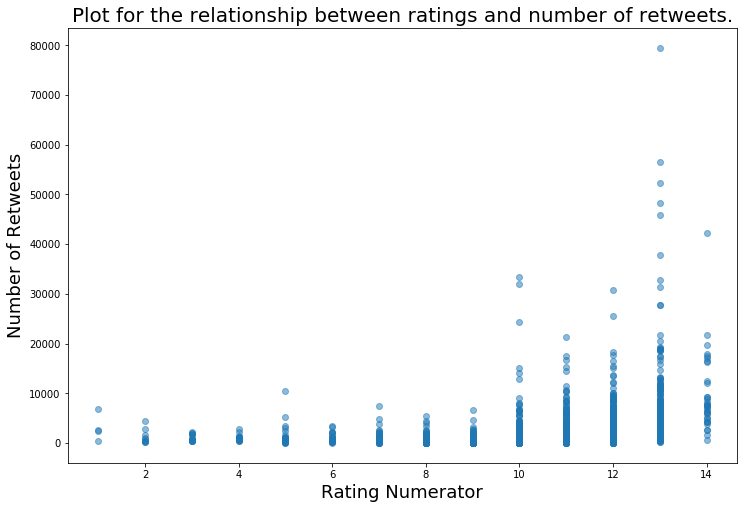

In [329]:
# Plot of the relationship between rating_numerator and the number of retweets:
plt.figure(figsize= [12,8])                               
plt.scatter(x = master_twitter_archives['rating_numerator'], y = master_twitter_archives['retweet_count'], alpha = .5)                         # Transparency
plt.xlabel('Rating Numerator', fontsize = 18)
plt.ylabel('Number of Retweets', fontsize = 18)
plt.title('Plot for the relationship between ratings and number of retweets.', fontsize = 20)
plt.show()  